## Project - Computer Vision
### GUMED
### Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has 
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages
Objective:
To implement the techniques learnt as a part of the course.

### Learning Outcomes:
 Pre-processing of image data.
 Visualization of images.
 Building CNN.  Evaluate the Model.  The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

### Guide to solve the project seamlessly:
Here are the points which will help you to solve the problem efficiently:
       Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
        Download the dataset from the Olympus platform.
        Upload the "images.npy" and “Labels.csv” file to google drive.  
        Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
        You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

### Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. 
2. Data Pre-processing: 
        a. Normalization.
        b. Gaussian Blurring.
        c. Visualize data after pre-processing.
3. Make data compatible: 
        a. Convert labels to one-hot-vectors.
        b. Print the label for y_train[0].
        c. Split the dataset into training, testing, and validation set.
        (Hint: First split images and labels into training and testing set with test_size = 0.3. 
        Then further split test data into test and validation set with test_size = 0.5)
        d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. 
        If it’s already in the compatible shape, then comment in the notebook that it’s already in 
        compatible shape.
4. Building CNN: 
        a. Define layers.
        b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. 
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. 

In [1]:
# Mounting the drive in Google Colab to use the files
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the required packages

import os # library for creating data paths
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pylab as plt

import cv2
from google.colab.patches import cv2_imshow

# library for reading and showing images
import matplotlib.image as mpimg

In [3]:
# Calling the sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import svm

# Calling the keras libraries
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from tensorflow.keras.utils import Sequence
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.utils import to_categorical

In [4]:
import warnings
# Declare tensorflow as tf
import tensorflow as tf
tf.__version__

'2.5.0'

In [5]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20

In [6]:
# save numpy array as npy file
from numpy import save
# load numpy array from npy file
from numpy import load
# load array
images = np.load('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/images.npy')
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/Labels.csv')

In [7]:
#Shape of images dataset
print("The shape for the images dataset: ", images.shape)

The shape for the images dataset:  (4750, 128, 128, 3)


In [8]:
#Shape of labels dataset
print("The shape of the labels dataset: ", labels.shape)

The shape of the labels dataset:  (4750, 1)


In [9]:
# Both datasets have a length of 4750 rows

In [10]:
# VISUALIZE THE IMAGES IN THE DATASET

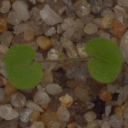

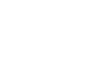

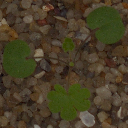

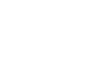

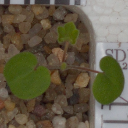

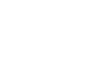

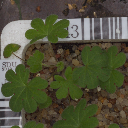

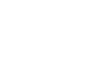

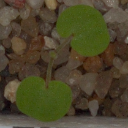

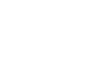

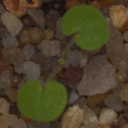

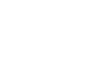

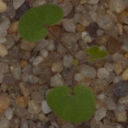

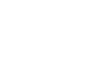

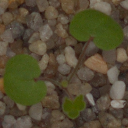

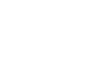

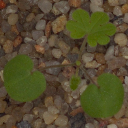

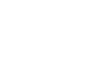

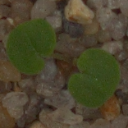

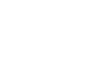

In [11]:
for i in range(10) :
   cv2_imshow(images[i])
   ax = plt.subplot(4, 4, i + 1)
   ax.axis('Off')
   plt.show()

In [12]:
# NORMALIZATION
image = images/255

In [13]:
image

array([[[[0.1372549 , 0.20392157, 0.30588235],
         [0.14117647, 0.19215686, 0.29803922],
         [0.12156863, 0.17647059, 0.27058824],
         ...,
         [0.30588235, 0.37254902, 0.44705882],
         [0.29803922, 0.36470588, 0.43137255],
         [0.31372549, 0.37254902, 0.42745098]],

        [[0.12941176, 0.18039216, 0.26666667],
         [0.14509804, 0.19607843, 0.28627451],
         [0.18823529, 0.25490196, 0.3254902 ],
         ...,
         [0.31764706, 0.37647059, 0.44313725],
         [0.29019608, 0.34901961, 0.41176471],
         [0.3254902 , 0.37254902, 0.42745098]],

        [[0.13333333, 0.19607843, 0.26666667],
         [0.1372549 , 0.20392157, 0.28235294],
         [0.2745098 , 0.33333333, 0.39607843],
         ...,
         [0.3254902 , 0.38039216, 0.43921569],
         [0.30980392, 0.36862745, 0.42352941],
         [0.30980392, 0.36862745, 0.41960784]],

        ...,

        [[0.1372549 , 0.19607843, 0.27058824],
         [0.16470588, 0.22352941, 0.28627451]

In [14]:
## GAUSSIAN BLURRING

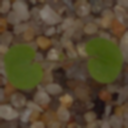

In [15]:
# Initialize an empty list to store the images after pre-processing.
preprocessed_images = []       
for img in images:
  
  # Use gaussian blurring
  blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
  cv2_imshow(blurImg)      
  plt.show()
  break

In [16]:
labels.head(10)

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
5,Small-flowered Cranesbill
6,Small-flowered Cranesbill
7,Small-flowered Cranesbill
8,Small-flowered Cranesbill
9,Small-flowered Cranesbill


In [17]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [18]:
labels.nunique()
classes = labels["Label"].nunique()
print('Unique categories:', classes)

Unique categories: 12


In [19]:
labels.isna().sum()

Label    0
dtype: int64

In [20]:
# Categorical variables
categorical_var = ["Label",]

# Printing number of count of each unique value in each column
for column in categorical_var:
    print(labels[column].value_counts())
    print("-" * 40)

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64
----------------------------------------


In [21]:
#Gaussian blurred for Normalized image

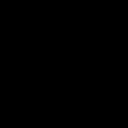

In [22]:
preprocessed_images = []       
for img2 in image:
  
  # Use gaussian blurring for normalized image
  blurImg2 = cv2.GaussianBlur(img2, (5, 5), 0)   
  cv2_imshow(blurImg2)
  plt.show()
  break

In [23]:
images[0:5]
images.shape

(4750, 128, 128, 3)

In [24]:
## RESHAPE THE DATASET

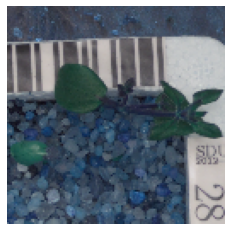

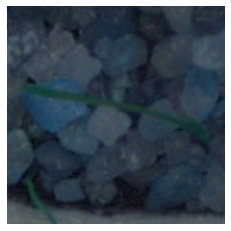

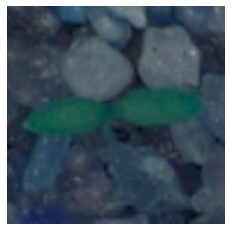

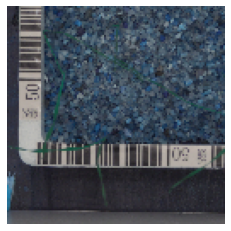

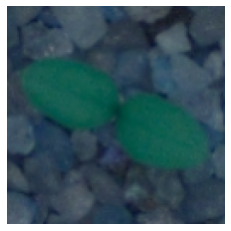

In [25]:
np.random.seed(20)
for i in np.random.randint(0, len(images), 5):
  plt.figure()
  plt.imshow(images[i].reshape(128,128,3)), plt.axis('off')

In [26]:
# image processing completed. Images is our needed input to train the Convoluted Neural Network.

In [27]:
## ONE-HOT ENCODING OF THE VECTOR

In [28]:
#Fetch the categories column from the dataframe, and tranform into to numerical labels

encoder = LabelEncoder()
Vector = encoder.fit_transform(labels["Label"])
Vector
Vector.shape

(4750,)

In [30]:
#One-hot encoding of the Target vector
Y = to_categorical(Vector, num_classes = classes)
Y[0:3]
Y.shape

(4750, 12)

In [31]:
#Test set for testing on the trained model
X_test = images[10000:,]
Y_test = Y[10000:,]

In [66]:
## SPLITTING THE DATASET

In [34]:
#Test set for testing on the trained model
X_test = images[10000:,]
Y_test = Y[10000:,]

#Validation set from the training set
#Validate while training the model
X_train, X_test, Y_train, Y_test = train_test_split(images[:10000,], Y[:10000,], test_size=0.3, random_state=13)

In [35]:
X_train, X_val, Y_train, Y_val = train_test_split(images[:10000,], Y[:10000,], test_size=0.5, random_state=13)

In [36]:
# Print Y_train[0]

In [37]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [38]:
#X_train shape
X_train.shape

(2375, 128, 128, 3)

In [39]:
### RESHAPPING THE DATA

In [40]:
#Reshape the input matrices such that each sample is three-dimensional

img_rows, img_cols = 128,128
input_shape = (img_rows, img_cols, 3)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)

X_val.shape

(2375, 128, 128, 3)

In [41]:
X_train.shape

(2375, 128, 128, 3)

In [42]:
model = models.Sequential()

In [65]:
## SET OPTIMIZER AND LOSS

In [44]:
# initiating Adam optimizer
optimize = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [49]:
# Let's train the model, loss with cross entropy, optimize with the Adam optimizer and measure the accuracy
model.compile(loss='categorical_crossentropy',
              optimizer=optimize,
              metrics=['accuracy'])

In [46]:
#Reshape data from 2D to 1D
model.add(tf.keras.layers.Reshape((16384,),input_shape=(128,128)))

In [67]:
## DEFINING LAYERS

In [68]:
# Set the Convoluted Neural Network (CNN) model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='valid', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='valid', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
batch_normalization_4 (Batch (None, 124, 124, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
batch_normalization_5 (Batch (None, 58, 58, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 64)       

In [55]:
scores = model.evaluate(X_test, Y_test)

45/45 [==============================] - 1s 13ms/step - loss: 15.1510 - accuracy: 0.1221


In [56]:
print("Test loss: ", scores[0])

Test loss:  15.151020050048828


In [57]:
print("Test accuracy: ", scores[1])

Test accuracy:  0.12210526317358017
